# Student Performance Dataset – Exploratory Data Analysis

This notebook performs exploratory data analysis (EDA) on a dataset of student performance and grading.

We’ll cover:
1. Dataset structure and feature types
2. Categorical feature exploration
3. Numerical feature distributions
4. Correlation and patterns
5. Summary of insights

In [66]:
# EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plots in Jupyter
%matplotlib inline

# Set seaborn style for consistency
sns.set(style='whitegrid', palette='muted')


In [67]:
# Load dataset
DATA_PATH = "data/Students_Grading_Dataset_Biased.csv"

try:
    data = pd.read_csv(DATA_PATH)
    print(f"Dataset loaded successfully from '{DATA_PATH}'")
    print(f"Dataset shape: {data.shape[0]} rows, {data.shape[1]} columns")
except FileNotFoundError:
    print(f"File not found at path: {DATA_PATH}")


Dataset loaded successfully from 'data/Students_Grading_Dataset_Biased.csv'
Dataset shape: 5000 rows, 23 columns


## 1. Dataset Structure

Overview of feature types and data completeness.


In [68]:
# Overview of structure, data types, and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [69]:
# Summary of feature types
print("Feature type breakdown:")
print(data.dtypes.value_counts())


Feature type breakdown:
object     11
float64    10
int64       2
dtype: int64


In [70]:
print("Feature names:")
print(data.columns)


Feature names:
Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')


### Missing Values

We identify features with missing values to inform later preprocessing steps.


In [71]:
# Count of missing values per column
missing_counts = data.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
missing_counts


Parent_Education_Level    984
Assignments_Avg           517
Attendance (%)            516
dtype: int64

### Feature Classification

We separate the features into numerical and categorical groups based on their data types.


In [72]:
# Categorical features
categorical_features = data.select_dtypes(include='object').columns.tolist()
# Remove ID/Name fields from categoricals
categorical_features = [col for col in categorical_features if col not in ['Student_ID', 'First_Name', 'Last_Name', 'Email']]

print(f"Categorical features ({len(categorical_features)}):")

print(categorical_features)

Categorical features (7):
['Gender', 'Department', 'Grade', 'Extracurricular_Activities', 'Internet_Access_at_Home', 'Parent_Education_Level', 'Family_Income_Level']


In [73]:
# Numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nNumerical features ({len(numerical_features)}):")
print(numerical_features)



Numerical features (12):
['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 'Study_Hours_per_Week', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']


## 2. Categorical Feature Exploration

We examine the distribution of categorical features using value counts and count plots to identify imbalances or inconsistencies.


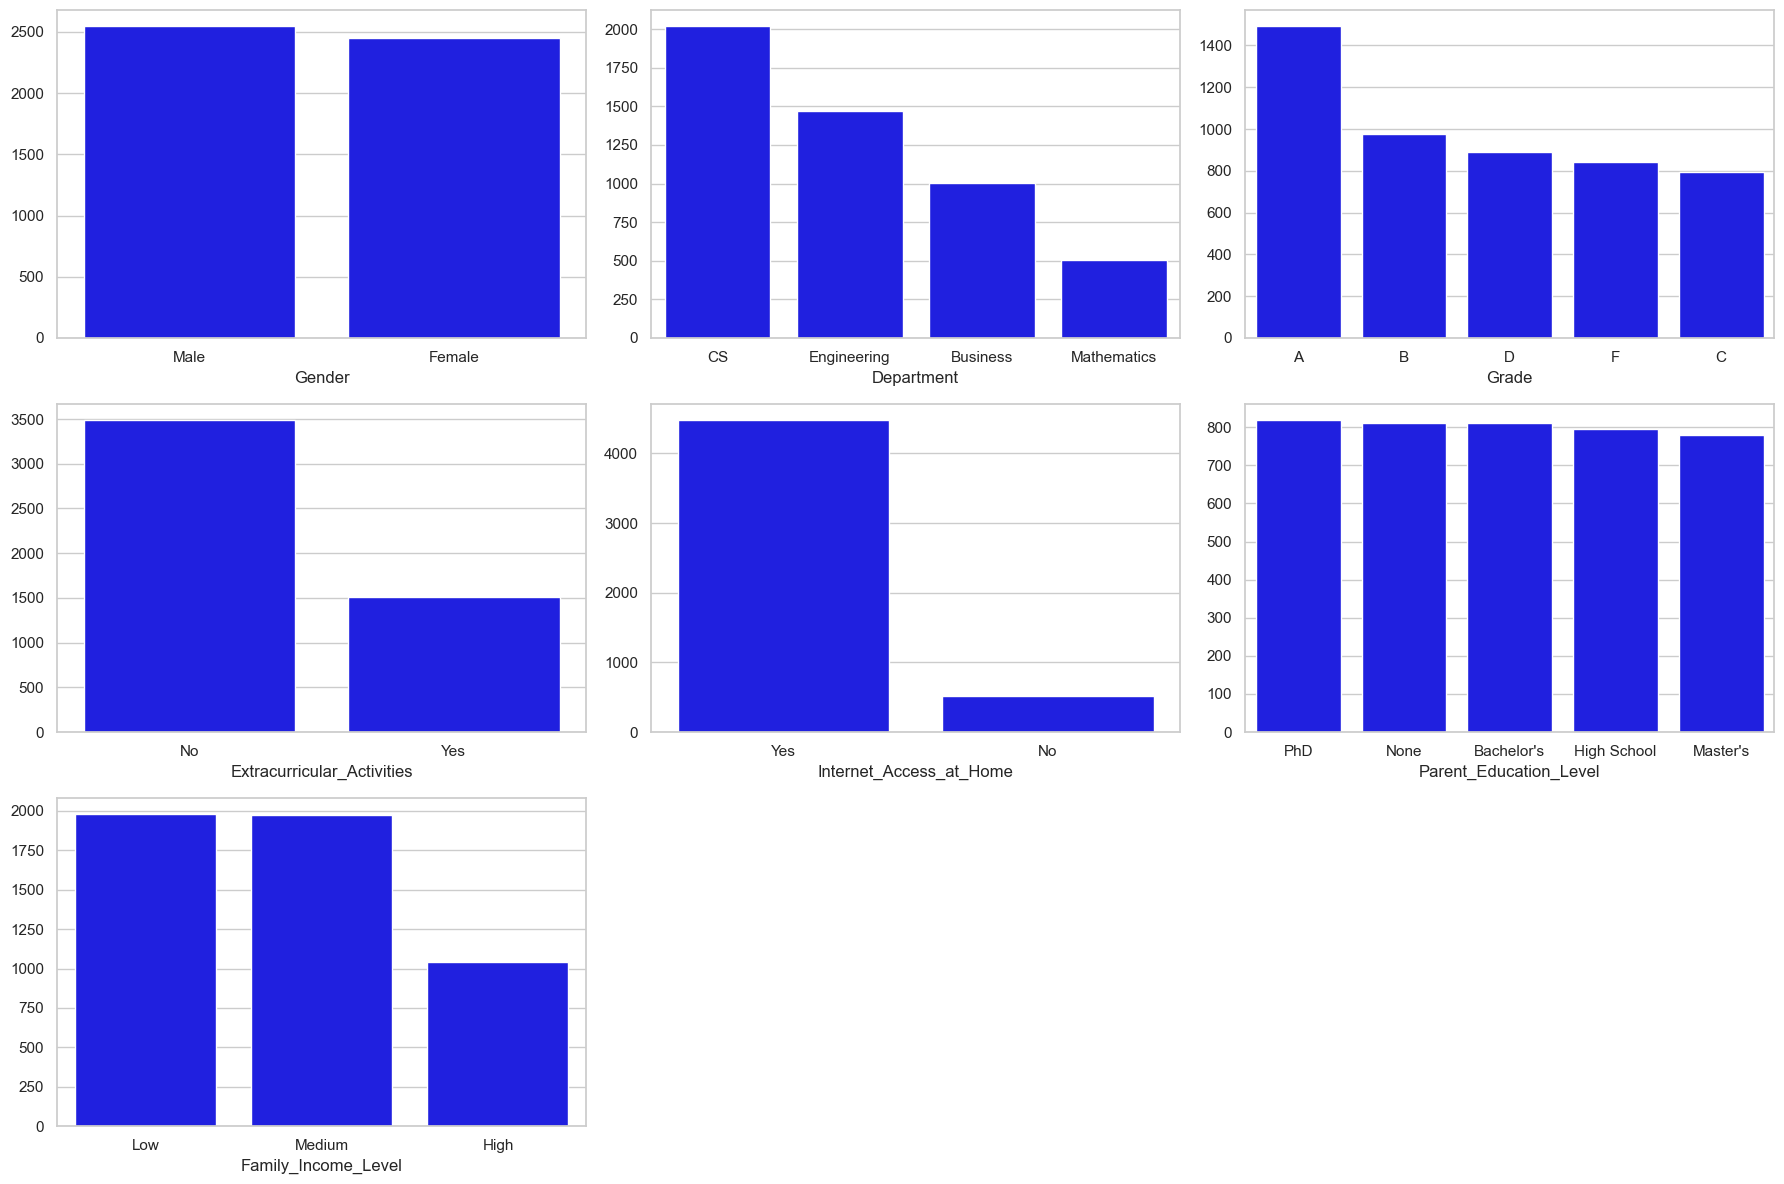

In [85]:
## Count Plots for Selected Categorical Features
selected_cats = ['Gender', 'Department', 'Grade', 'Extracurricular_Activities', 'Internet_Access_at_Home', 'Parent_Education_Level', 'Family_Income_Level']
import matplotlib.pyplot as plt  # Re-imports and resets

plt.figure(figsize=(18, 4 * 3))  # 3 rows x 3 columns


for i, col in enumerate(selected_cats):
    plt.subplot(3, 3, i + 1)
    ax = sns.countplot(data=data, x=col, order=data[col].value_counts().index, color='blue')
    ax.set_ylabel("") 
    
plt.tight_layout()
plt.show()


### Observations from Categorical Feature Distributions

- The gender distribution is balanced, with no significant difference in counts between male and female students.

- Most students are enrolled in the Computer Science department, followed by Engineering and Business, with Mathematics being the least represented.
- Grade distribution is skewed toward high performers: A is the most common grade, followed by B, D, F, and C with approximately equal frequencies.
- A majority of students do not participate in extracurricular activities.
- Most students have internet access at home.
- Family income levels are mostly low or medium, with high-income families being about half as common.
- Parental education levels are evenly distributed across the dataset.
